# CS 109A/AC 209A/STAT 121A Data Science: Homework 0
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**

Import libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from bs4 import BeautifulSoup
import urllib
%matplotlib inline

## Problem 1: Processing Tabular Data from File

In this problem, we practice reading csv formatted data and doing some very simple data exploration.

### Part (a): Reading CSV Data with Numpy

Open the file $\mathtt{dataset}$\_$\mathtt{HW0.txt}$, containing birth biometrics as well as maternal data for a number of U.S. births, and inspect the csv formatting of the data. Load the data, without the column headers, into an numpy array. 

Do some preliminary explorations of the data by printing out the dimensions as well as the first three rows of the array. Finally, for each column, print out the range of the values. 

<b>Prettify your output</b>, add in some text and formatting to make sure your outputs are readable (e.g. "36x4" is less readable than "array dimensions: 36x4").

In [2]:
birth_data = np.loadtxt("dataset_HW0.txt", delimiter = ',', skiprows = 1)
print "Dimension of table:", birth_data.shape
print "First 3 rows:", birth_data[0:3,:]
print "Range of column 0:", birth_data[:,0].min(), birth_data[:,0].max()
print "Range of column 1:", birth_data[:,1].min(), birth_data[:,1].max()
print "Range of column 2:", birth_data[:,2].min(), birth_data[:,2].max()

Dimension of table: (400, 3)
First 3 rows: [[  2.9694893    1.97915605  16.        ]
 [  4.03896294   3.5556812   16.        ]
 [  5.30264328   3.3856329   15.        ]]
Range of column 0: 2.96742562601 9.02194194628
Range of column 1: 0.479154166011 6.64873007157
Range of column 2: 15.0 49.0


### Part (b): Simple Data Statistics

Compute the mean birth weight and mean femur length for the entire dataset. Now, we want to split the birth data into three groups based on the mother's age:

1. Group I: ages 0-17
2. Group II: ages 18-34
3. Group III: ages 35-50

For each maternal age group, compute the mean birth weight and mean femure length. 

<b>Prettify your output.</b>

Compare the group means with each other and with the overall mean, what can you conclude?

In [3]:
group1 = birth_data[birth_data[:,2] <= 17]
group2 = birth_data[[birth_data[:,2] <= 34] and [birth_data[:,2] >= 18]]
group3 = birth_data[[birth_data[:,2] <= 50] and [birth_data[:,2] >= 35]]

print "Group1 Mean birth weight:", group1[:,0].mean()
print "Group1 Mean femur length:", group1[:,1].mean()

print "Group2 Mean birth weight:", group2[:,0].mean()
print "Group2 Mean femur length:", group2[:,1].mean()

print "Group3 Mean birth weight:", group3[:,0].mean()
print "Group3 Mean femur length:", group3[:,1].mean()

Group1 Mean birth weight: 5.16889979912
Group1 Mean femur length: 3.50680640853
Group2 Mean birth weight: 6.41579363078
Group2 Mean femur length: 3.93451897254
Group3 Mean birth weight: 5.83665361844
Group3 Mean femur length: 3.79489080744


### Part (c): Simple Data Visualization

Visualize the data using a 3-D scatter plot. How does your visual analysis compare with the stats you've computed in Part (b)?

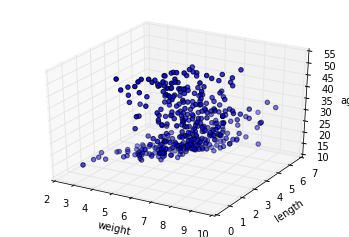

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(birth_data[:,0], birth_data[:,1], birth_data[:,2])

ax.set_xlabel("weight")
ax.set_ylabel('length')
ax.set_zlabel('age')

### Part (d): Simple Data Visualization (Continued)

Visualize two data attributes at a time,

1. maternal age against birth weight
2. maternal age against femur length
3. birth weight against femur length

using 2-D scatter plots.

Compare your visual analysis with your analysis from Part (b) and (c).

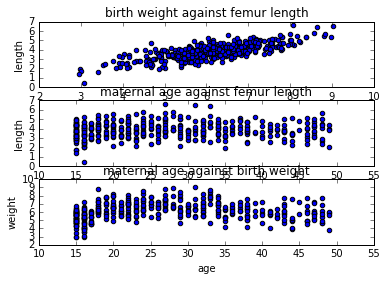

In [5]:
fig = plt.figure()

ax1 = fig.add_subplot(311)
ax1.scatter(birth_data[:,0], birth_data[:, 1])
ax1.set_xlabel("weight")
ax1.set_ylabel("length")
ax1.set_title("birth weight against femur length")

ax1 = fig.add_subplot(312)
ax1.scatter(birth_data[:,2], birth_data[:, 1])
ax1.set_xlabel("age")
ax1.set_ylabel("length")
ax1.set_title("maternal age against femur length")

ax1 = fig.add_subplot(313)
ax1.scatter(birth_data[:,2], birth_data[:, 0])
ax1.set_xlabel("age")
ax1.set_ylabel("weight")
ax1.set_title("maternal age against birth weight")

### Part (e): More Data Visualization

Finally, we want to visualize the data by maternal age group. Plot the data again using a 3-D scatter plot, this time, color the points in the plot according to the age group of the mother (e.g. use red, blue, green to represent group I, II and III respectively).

Compare your visual analysis with your analysis from Part (a) - (c).

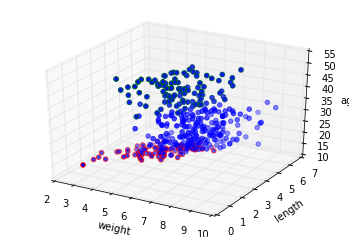

In [6]:
fig = plt.figure()

ax = fig.add_subplot(111, projection = "3d")
ax.scatter(group1[:,0], group1[:,1], group1[:,2], color = 'red')
ax.scatter(group2[:,0], group2[:,1], group2[:,2], color = 'blue')
ax.scatter(group3[:,0], group3[:,1], group3[:,2], color = 'green')
ax.set_xlabel("weight")
ax.set_ylabel("length")
ax.set_zlabel("age")

## Problem 2: Processing Web Data

In this problem we practice some basic web-scrapping using Beautiful Soup.

### Part (a): Opening and Reading Webpages

Open and load the page (Kafka's The Metamorphosis) at 

$\mathtt{http://www.gutenberg.org/files/5200/5200-h/5200-h.htm}$

into a BeautifulSoup object. 

The object we obtain is a parse tree (a data structure representing all tags and relationship between tags) of the html file. To concretely visualize this object, print out the first 1000 characters of a representation of the parse tree using the $\mathtt{prettify()}$ function.

In [14]:
page = urllib.urlopen('http://www.gutenberg.org/files/5200/5200-h/5200-h.htm')
soup = BeautifulSoup(page, 'html.parser' )
print soup.prettify()[:1000]

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
 <head>
  <title>
   Metamorphosis by Franz Kafka
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
  </meta>
 </head>
 <body>
  <pre>

The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG


### Part (b): Exploring the Parsed HTML

Explore the nested data structure you obtain in Part (a) by printing out the following:

1. the content of the head tag
2. the text of the head tag
3. each child of the head tag
2. the text of the title tag
3. the text of the preamble (pre) tag
4. the text of the first paragraph (p) tag

In [23]:
print soup.head.contents
print soup.head.string

for child in soup.head.contents:
    print child
    
print soup.title.text

print soup.pre.text

print soup.p.string

[u'\n', <title>Metamorphosis by Franz Kafka</title>, u'\n', <meta content="text/html; charset=unicode-escape" http-equiv="Content-Type">\n</meta>]
None


<title>Metamorphosis by Franz Kafka</title>


<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
</meta>
Metamorphosis by Franz Kafka


The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-88

### Part (c): Extracting Text

Now we want to extract the text of The Metamorphosis and do some simple analysis. Beautiful Soup provides a way to extract all text from a webpage via the $\mathtt{get}$_$\mathtt{text()}$ function. 

Print the first and last 5000 characters of the text returned by $\mathtt{get}$_$\mathtt{text()}$. Is this the content of the novela? Where is the content of The Metamorphosis stored in the BeautifulSoup object?

In [47]:
print soup.get_text()[:5000]
print soup.get_text()[-5000:-1]




Metamorphosis by Franz Kafka





The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG EBOOK METAMORPHOSIS ***






Copyright (C) 2002 by David Wyllie.




  Metamorphosis
  Franz Kafka
Translated by David Wyllie
I
One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed i

### Part (d): Extracting Text (Continued)

Using the $\mathtt{find}$_$\mathtt{all()}$ function, extract the text of all $\mathtt{p}$ tags and concatenate the result into a single string. Print out the first 1000 characters of the string as a sanity check.

In [52]:
pars = [par.string for par in soup.find_all("p")]
text = []
for par in pars:
    text.append(par)
text = ' '.join(text)
print text[:1000]

One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.  He lay on
his armour-like back, and if he lifted his head a little he could
see his brown belly, slightly domed and divided by arches into stiff
sections.  The bedding was hardly able to cover it and seemed ready
to slide off any moment.  His many legs, pitifully thin compared
with the size of the rest of him, waved about helplessly as he
looked. "What's happened to me?" he thought.  It wasn't a dream.  His room,
a proper human room although a little too small, lay peacefully
between its four familiar walls.  A collection of textile samples
lay spread out on the table - Samsa was a travelling salesman - and
above it there hung a picture that he had recently cut out of an
illustrated magazine and housed in a nice, gilded frame.  It showed
a lady fitted out with a fur hat and fur boa who sat upright,
raising a heavy fur muff that covered the whole of he


### Part (e): Sentence and Word Count

Count the number of words in The Metamorphosis. Compute the average word length and plot a histogram of word lengths.

Count the number of sentences in The Metamorphosis. Compute the average sentence length and plot a histogram of sentence lengths.

**Hint**: You'll need to pre-process the text in order to obtain the correct word/sentence length and count. 

22010


(array([  3.98100000e+03,   9.65600000e+03,   4.78600000e+03,
          1.52000000e+03,   1.44700000e+03,   4.84000000e+02,
          7.10000000e+01,   5.70000000e+01,   5.00000000e+00,
          3.00000000e+00]),
 array([  1. ,   2.7,   4.4,   6.1,   7.8,   9.5,  11.2,  12.9,  14.6,
         16.3,  18. ]),
 <a list of 10 Patch objects>)

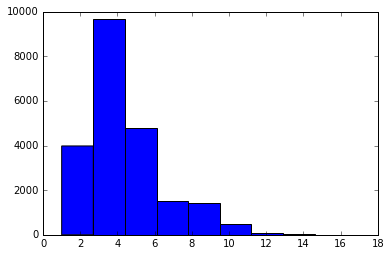

In [62]:
# count number of words in Metamorphosis
words = text.replace('-', '')
print len(words.split())

words_len = [len(word) for word in words.split()]
plt.hist(words_len)

## Problem 3: Data from Simulations

In this problem we practice generating data by setting up a simulation of a simple phenomenon, a queue. 

Suppose we're interested in simulating a queue that forms in front of a small Bank of America branch with one teller, where the customers arrive one at a time.

We want to study the queue length and customer waiting time.

### Part (a): Simulating Arrival and Service Time

Assume that gaps between consecutive arrivals are uniformly distributed over the interval of 1 to 20 minutes (i.e. any two times between 1 minute and 6 minutes are equally likely). 

Assume that the service times are uniform over the interval of 5 to 15 minutes. 

Generate the arrival and service times for 100 customers, using the $\mathtt{uniform()}$ function from the $\mathtt{random}$ library.

In [74]:

arrival_gap = np.random.uniform(1,20,size = 100)
arrival_time = np.array([sum(arrival_gap[:i+1]) for i in range(100)])
service_time = np.random.uniform(5, 15, size = 100)

### Part (b): Simulating the Queue

Write function that computes the average queue length and the average customer wait time, given the arrival times and the service times.

In [129]:
def simulation(arrival, service):
    queue = [0]
    wait_time = [0]
    leaving_times = [arrival[0] + service[0]]
    
    for i in range(1, len(arrival)):
        queue.append(len([time for time in leaving_times if time > arrival[i]]))
        wait_time.append(max(0, leaving_times[i-1] - arrival[i]))
        leaving_times.append(arrival[i] + service[i] + wait_time[i])
    return sum(queue)/(len(queue)), sum(wait_time)/float(len(wait_time))

In [130]:
simulation(arrival_time, service_time)

(2, 15.970844044552001)

### Part (c): Average Queue Length and Wait Time

Run your simulation 500 times and report the mean and std of the average wait time and queue length for 100 customers. What do these statistics mean?

Explain why is isn't sufficient to run our simulation **once** and report the average wait time/queue length we obtain.

In [132]:
wait_time = []
queue_len = []
for i in range(100):
    
    arrival_gap = np.random.uniform(1,20,size = 100)
    arrival_time = np.array([sum(arrival_gap[:i+1]) for i in range(100)])
    service_time = np.random.uniform(5, 15, size = 100)
    queue, wait = simulation(arrival_time, service_time)
    queue_len.append(queue)
    wait_time.append(wait)
wait_time = np.array(wait_time)
queue_len = np.array(queue_len)
print "mean of queue length %f, mean of average waiting time %f" % (queue_len.mean(), wait_time.mean())

mean of queue length 1.800000, mean of average waiting time 19.318770


## Problem 4 (Challenge Problem): More Web Scrapping
*Challenge Problems are required for students taking the course for graduate credit and are extra credit for all others.*

In this problem we practice extracting tabular web data. Open and read the webpage at

$\mathtt{http://www.thisismoney.co.uk/money/news/article-2928285/Economy-tables-GDP-rates-inflation-history-unemployment.html}$

Extract the Inflation History table and load it into a numpy array.

Generate a line graph representing the trend of consumer price index vs time (in months).

In [135]:
page = urllib.urlopen("http://www.thisismoney.co.uk/money/news/article-2928285/Economy-tables-GDP-rates-inflation-history-unemployment.html")
soup = BeautifulSoup()